# Spooky Author Identification

### Importing the common libraries:

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import log_loss

### The multiclass logloss:

In [135]:
def multiclass_logloss(actual, predicted, eps=1e-15):
    """Multi class version of Logarithmic Loss metric.
    :param actual: Array containing the actual target classes
    :param predicted: Matrix with class predictions, one probability per class
    """
    # Convert 'actual' to a binary array if it's not already:
    if len(actual.shape) == 1:
        actual2 = np.zeros((actual.shape[0], predicted.shape[1]))
        for i, val in enumerate(actual):
            actual2[i, val] = 1
        actual = actual2

    clip = np.clip(predicted, eps, 1 - eps)
    rows = actual.shape[0]
    vsota = np.sum(actual * np.log(clip))
    return -1.0 / rows * vsota

### Loading the datasets:

In [136]:
train_ds = pd.read_csv('train.csv')
test_ds = pd.read_csv('test.csv')

In [137]:
train_ds.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [138]:
test_ds.head()

,id,text
0,id02310,"Still, as I urged our leaving Ireland with suc..."
1,id24541,"If a fire wanted fanning, it could readily be ..."
2,id00134,And when they had broken down the frail door t...
3,id27757,While I was thinking how I should possibly man...
4,id04081,I am not sure to what limit his knowledge may ...


### Checking how many sentences each author has:

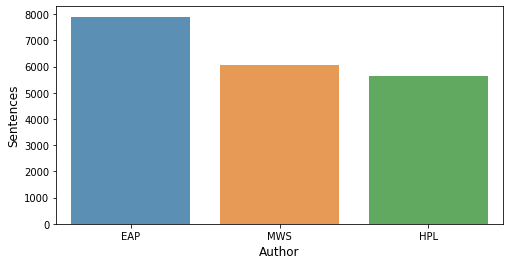

In [139]:
counts = train_ds['author'].value_counts()

plt.figure(figsize = (8, 4))
sns.barplot(counts.index, counts.values, alpha=0.8)
plt.ylabel('Sentences', fontsize=12)
plt.xlabel('Author', fontsize=12)
plt.show()

### Seperating the data into training and testing sets:

In [148]:
#lbl_enc = LabelEncoder()
#y = lbl_enc.fit_transform(train_ds.author.values)

X = train_ds.drop(['author'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(X.text.values, y, stratify = y, random_state = 42, test_size = 0.2)

In [149]:
print(x_train.shape)
print(x_test.shape)

(15663,)
(3916,)


### Count Vectorization:

In [150]:
from sklearn.feature_extraction.text import CountVectorizer

count_vec = CountVectorizer(analyzer = 'word', token_pattern = r'\w{1,}')

In [151]:
#Fitting the Count Vectorizer to the datasets.

count_vec.fit(list(x_train) + list(x_test))
x_train_vectorized = count_vec.transform(x_train)
x_test_vectorized = count_vec.transform(x_test)

### Multinomial Naive Bayes

In [152]:
from sklearn.naive_bayes import MultinomialNB

n_b = MultinomialNB()
n_b.fit(x_train_vectorized, y_train) ##it only accepts vectorized data

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [155]:
pred = n_b.predict_proba(x_test_vectorized)

print("logistic loss: %f" % log_loss(y_test, pred))
#pred.shape

logistic loss: 0.478631
